# Data Explorer and Analysis

### 1. Load the data into two DataFrames 
**choises_df**: Contains all rounds from all games

**games_df**: Contains the final choice and summary for each game

In [1]:
from utils.dataframe_utils import load_all_game_data

choices_df, games_df = load_all_game_data()

print(f"\nChoices DataFrame shape: {choices_df.shape}")
display(choices_df.head())

print(f"Games DataFrame shape: {games_df.shape}")
display(games_df.head())


Choices DataFrame shape: (124800, 6)


,game_id,round_nb,available_cues,chosen_quadrant,color,round_time
0,Qwen_3B_5r_2q_trial1,1,[B],B,RED,0.110301
1,Qwen_3B_5r_2q_trial1,2,[A],B,None,0.110996
2,Qwen_3B_5r_2q_trial1,3,[B],B,RED,0.111800
3,Qwen_3B_5r_2q_trial1,4,[B],B,RED,0.119507
4,Qwen_3B_5r_2q_trial1,5,[A],A,RED,0.125405


Games DataFrame shape: (15600, 9)


,game_id,model,nb_quadrants,nb_rounds,success,chosen_quadrant,biased_quadrant,trial_time,src_file
0,Qwen_3B_5r_2q_trial1,Qwen_3B,2,5,True,B,2,0.703200,Qwen_3B_5r_2q_1t_20250420_193119.json
1,Qwen_3B_5r_2q_trial2,Qwen_3B,2,5,True,B,2,0.697804,Qwen_3B_5r_2q_1t_20250420_193119.json
2,Qwen_3B_5r_2q_trial3,Qwen_3B,2,5,True,A,1,0.691340,Qwen_3B_5r_2q_1t_20250420_193119.json
3,Qwen_3B_5r_2q_trial4,Qwen_3B,2,5,False,A,2,0.687542,Qwen_3B_5r_2q_1t_20250420_193119.json
4,Qwen_3B_5r_2q_trial5,Qwen_3B,2,5,True,B,2,0.694044,Qwen_3B_5r_2q_1t_20250420_193119.json


In [2]:
model_counts = games_df["model"].value_counts().reset_index()
model_counts.columns = ["model", "num_games"]
display(model_counts)

,model,num_games
0,Qwen_3B,1300
1,Qwen_3B_quantized,1300
2,Qwen_3B_Instruct_quantized,1300
3,Qwen_7B_Instruct_quantized,1300
4,Qwen_1.5B,1300
5,Qwen_7B_Instruct,1300
6,Gemma_2B_Instruct,1300
7,Qwen_0.5B,1300
8,Qwen_7B,1300
9,Qwen_7B_quantized,1300


### 2. Round duration analysis

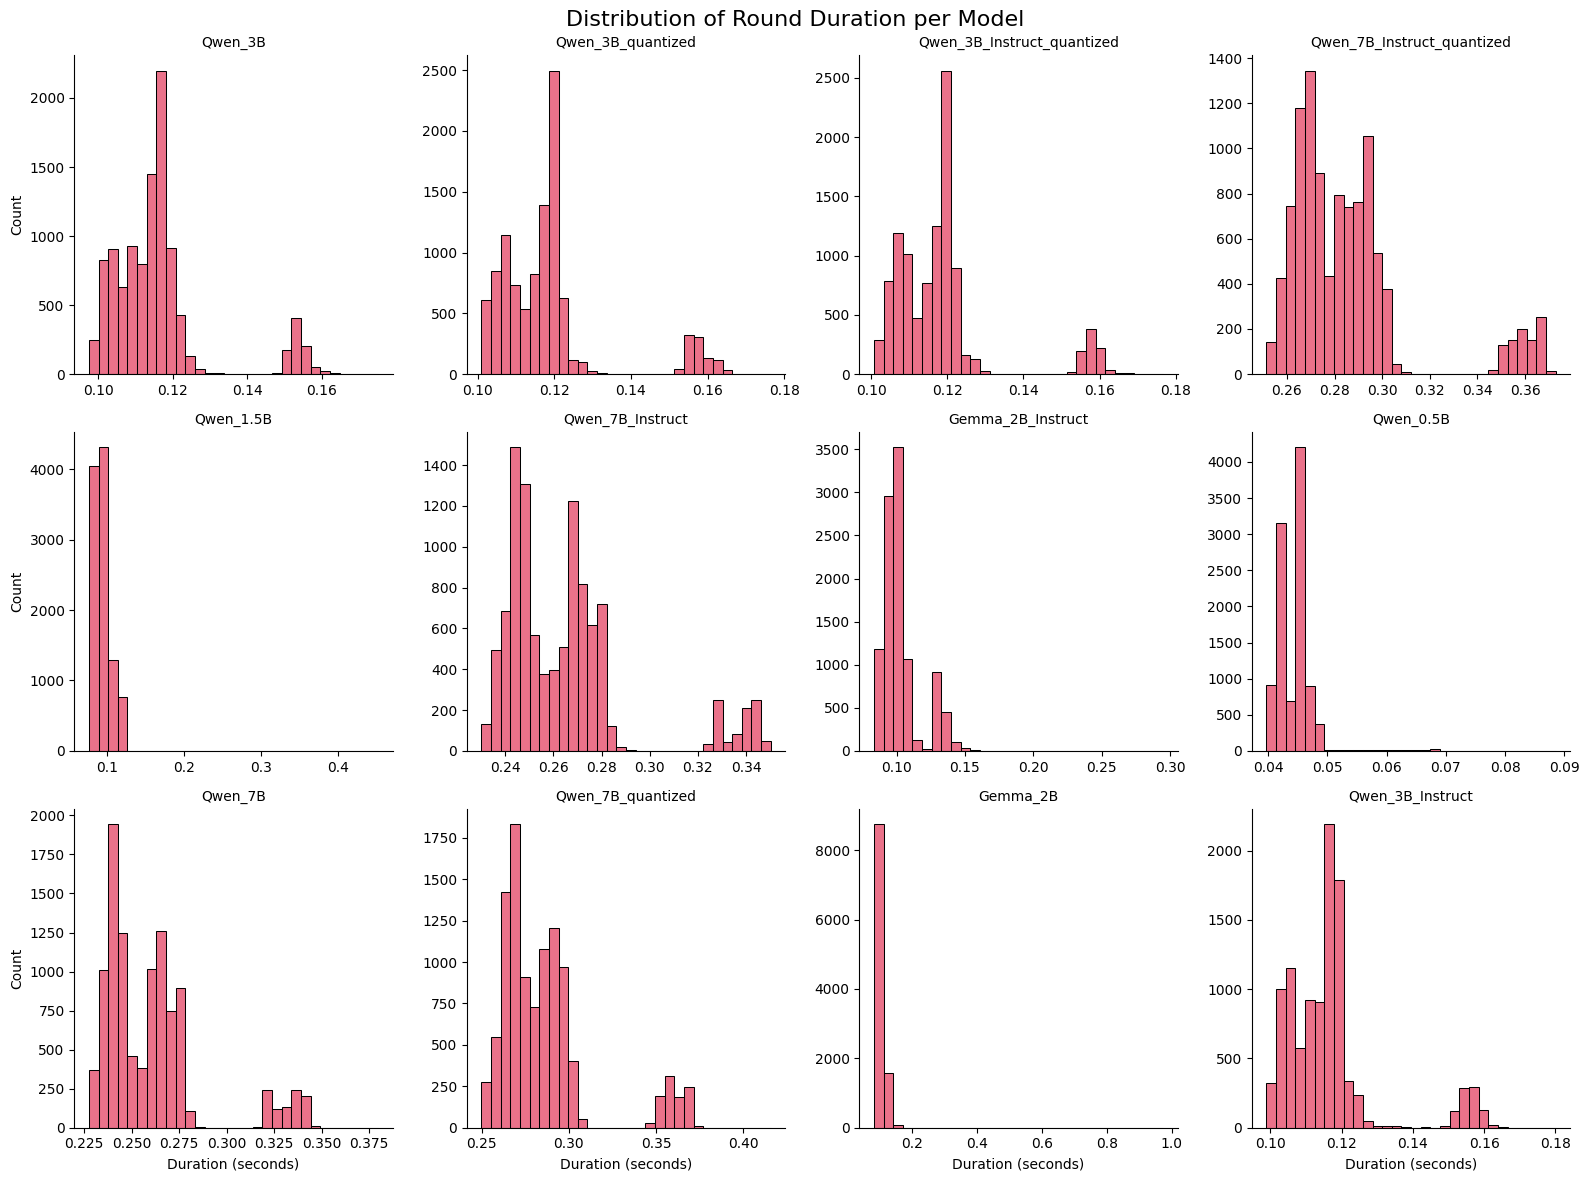

In [3]:
from utils.time_utils import *
plot_round_duration_by_model(choices_df, games_df)

**Observations**: We notice that most of the models show a bimodal distribution of round durations.

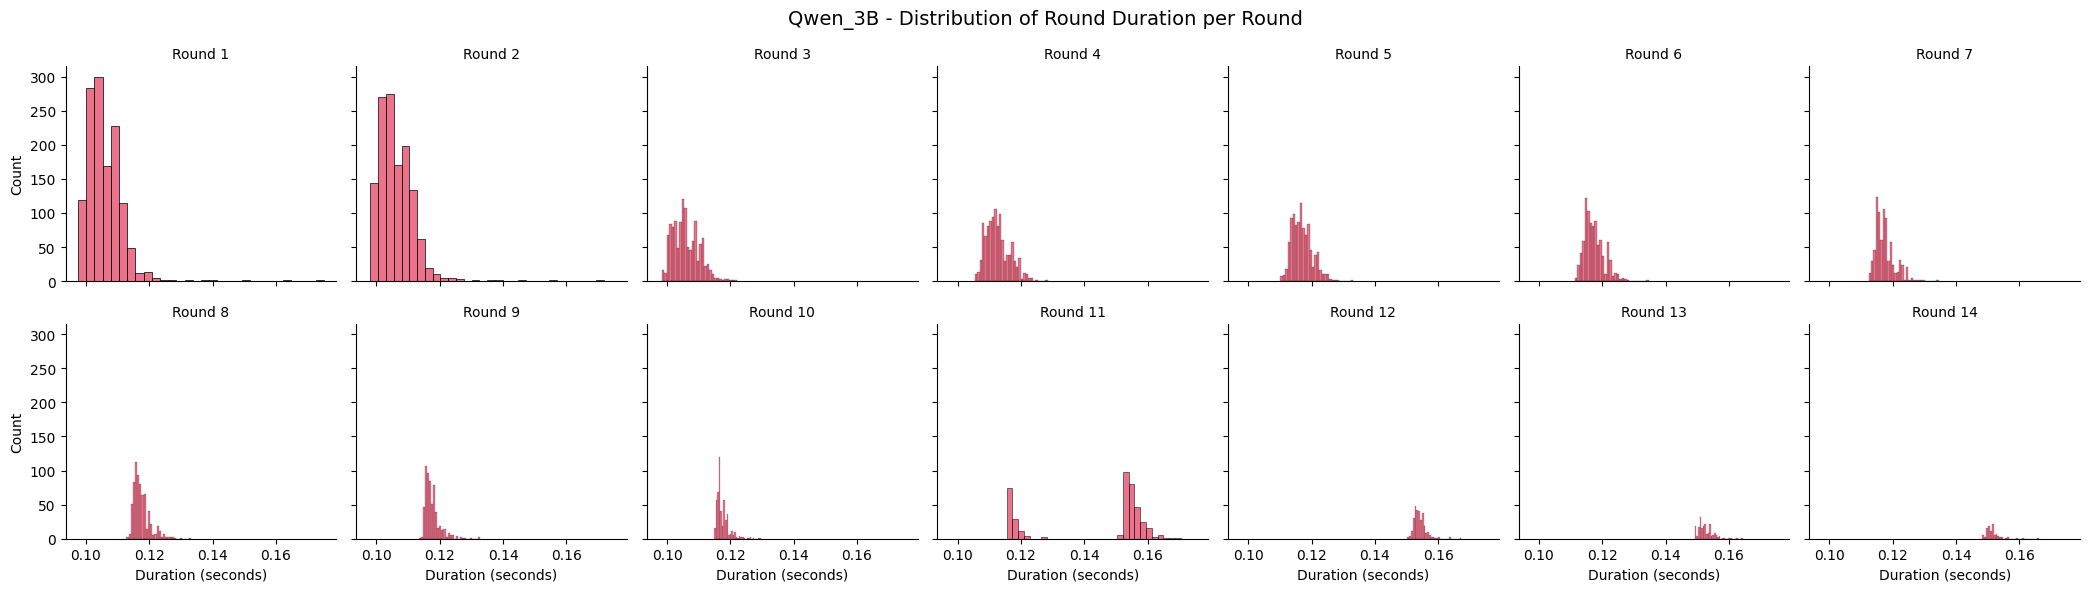

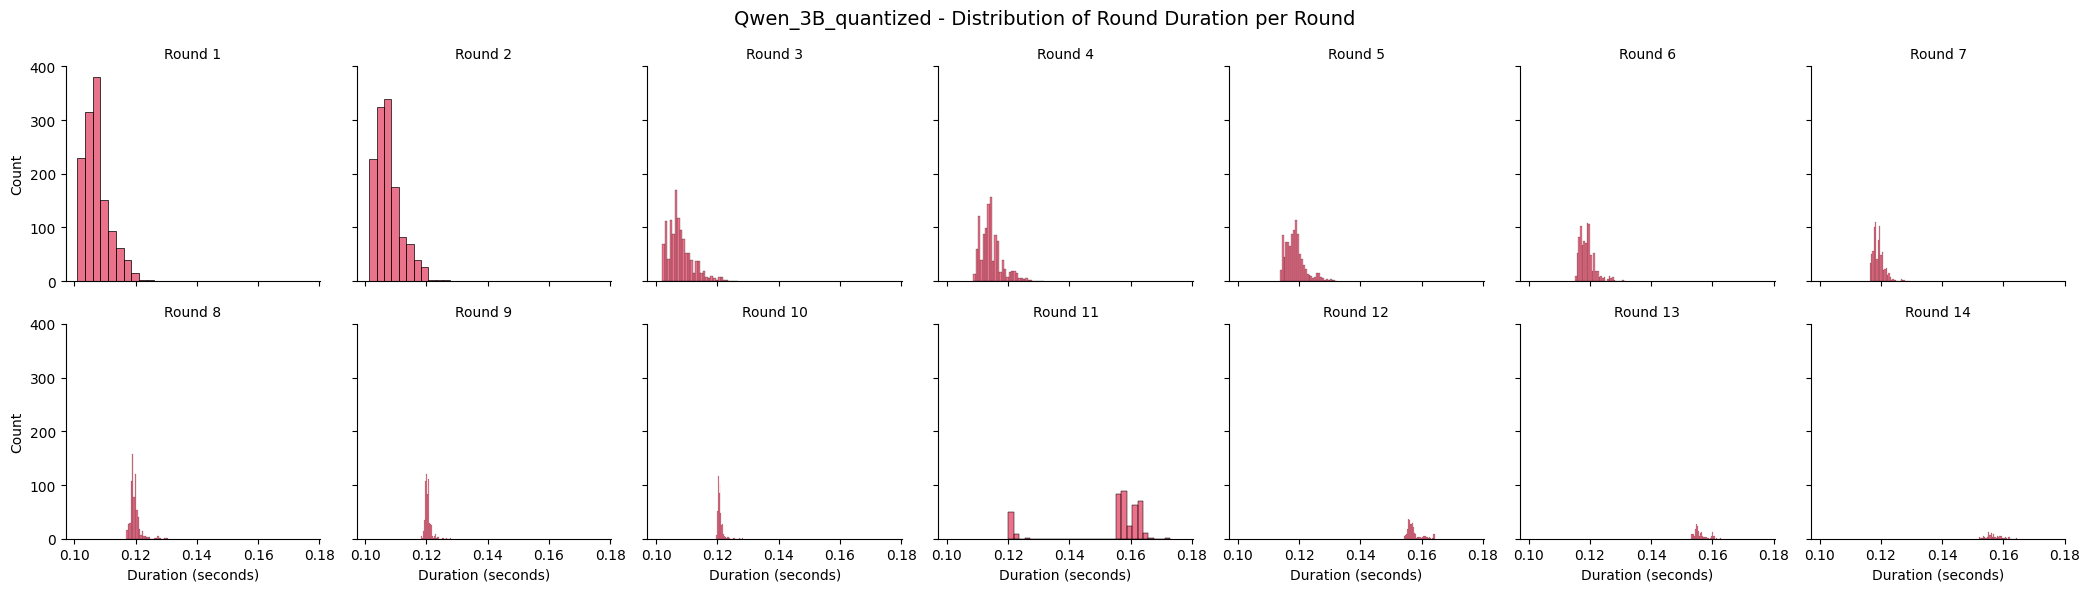

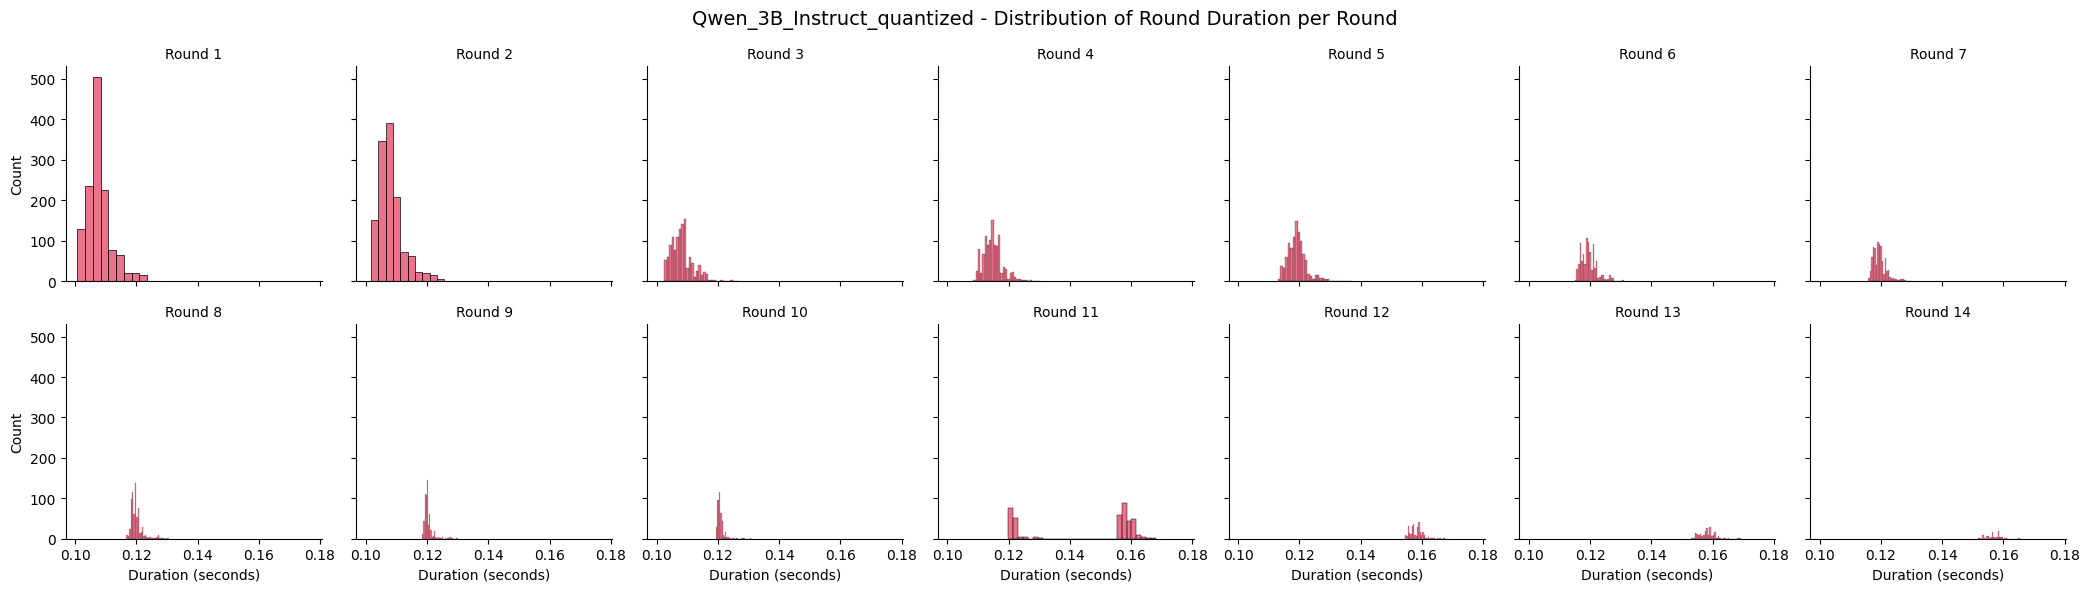

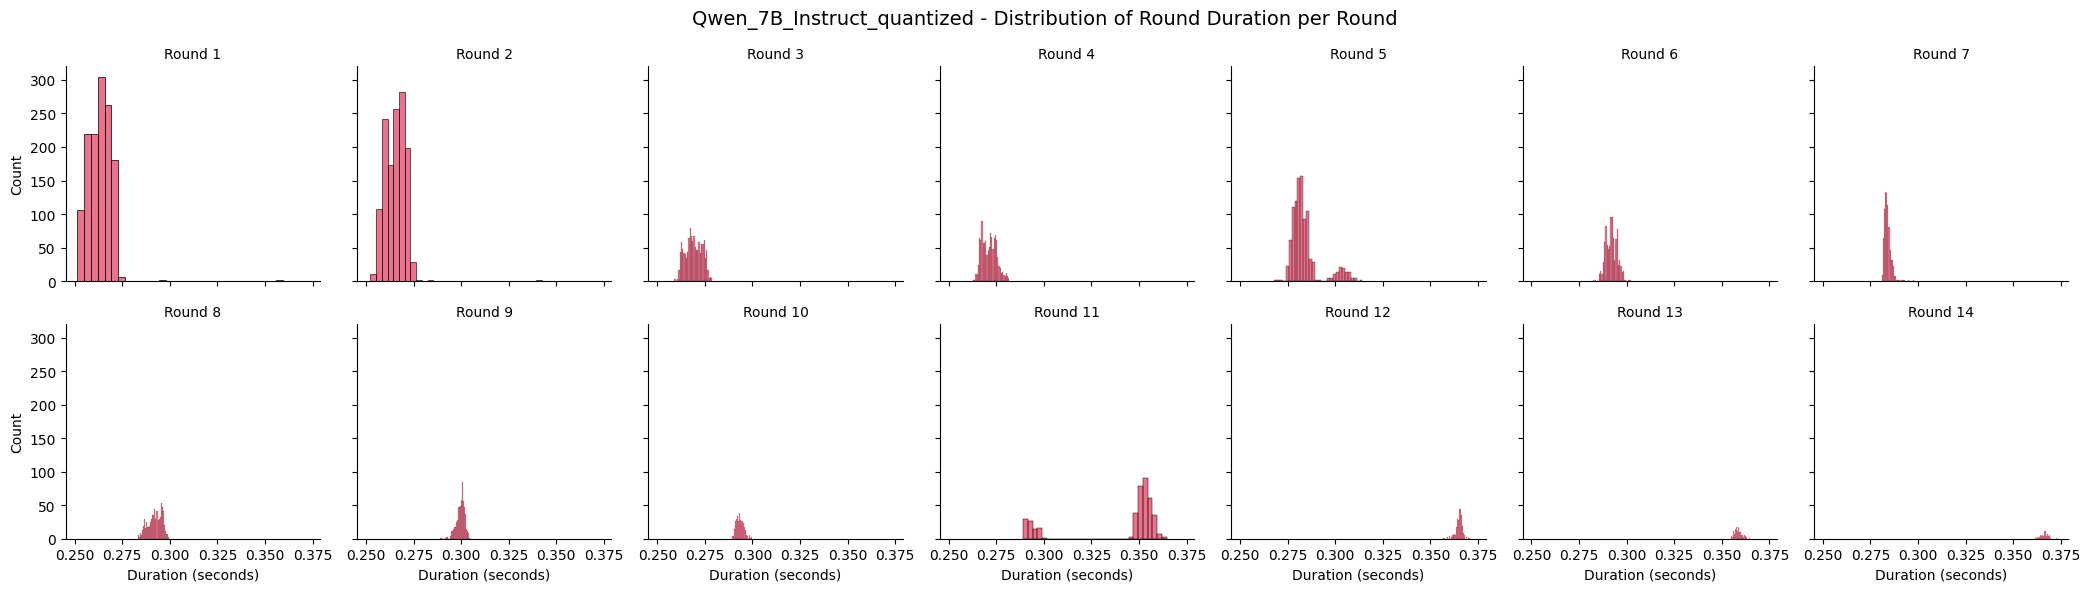

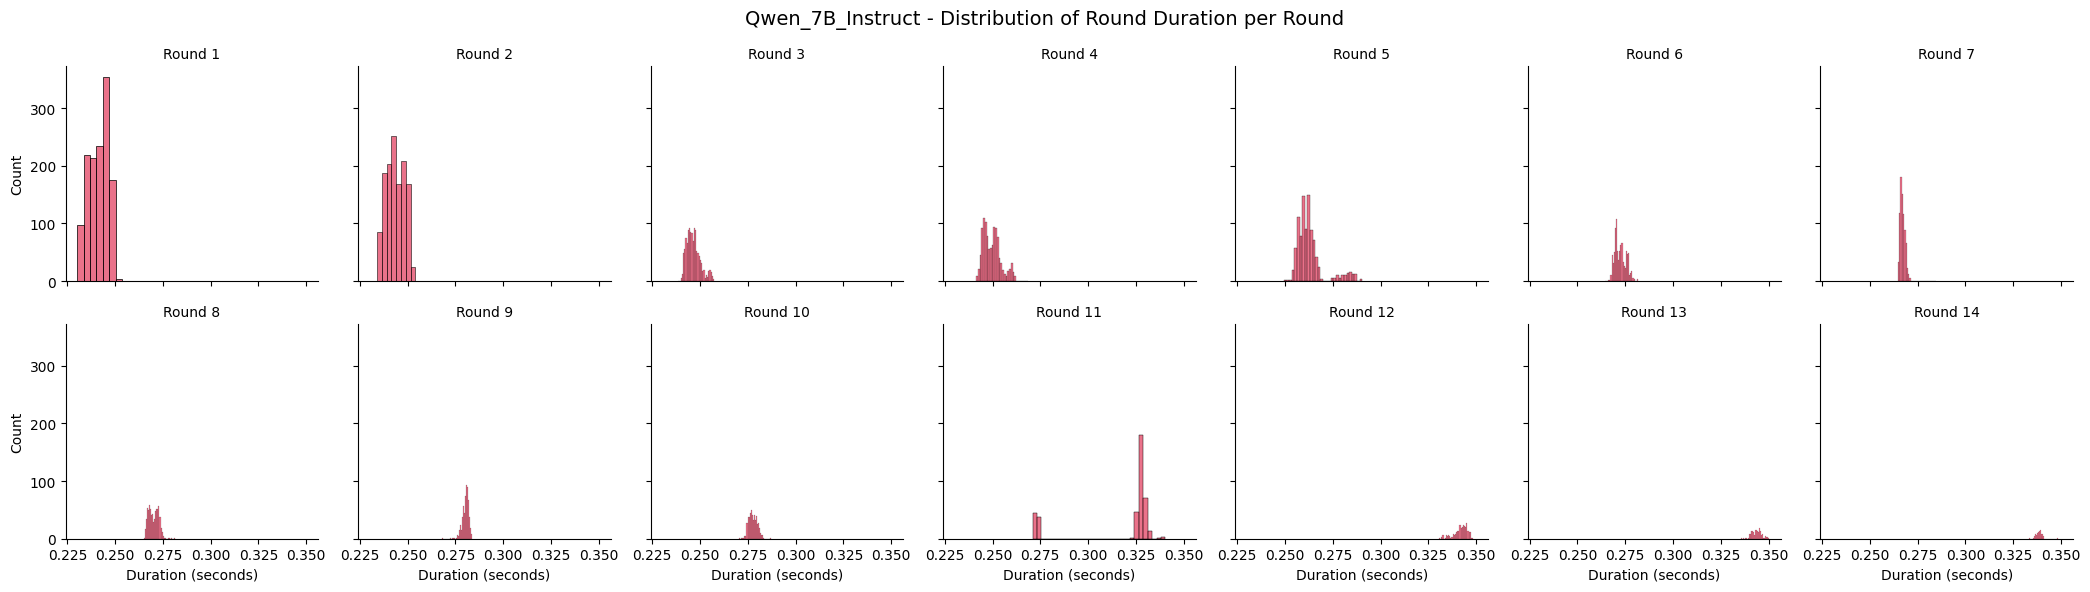

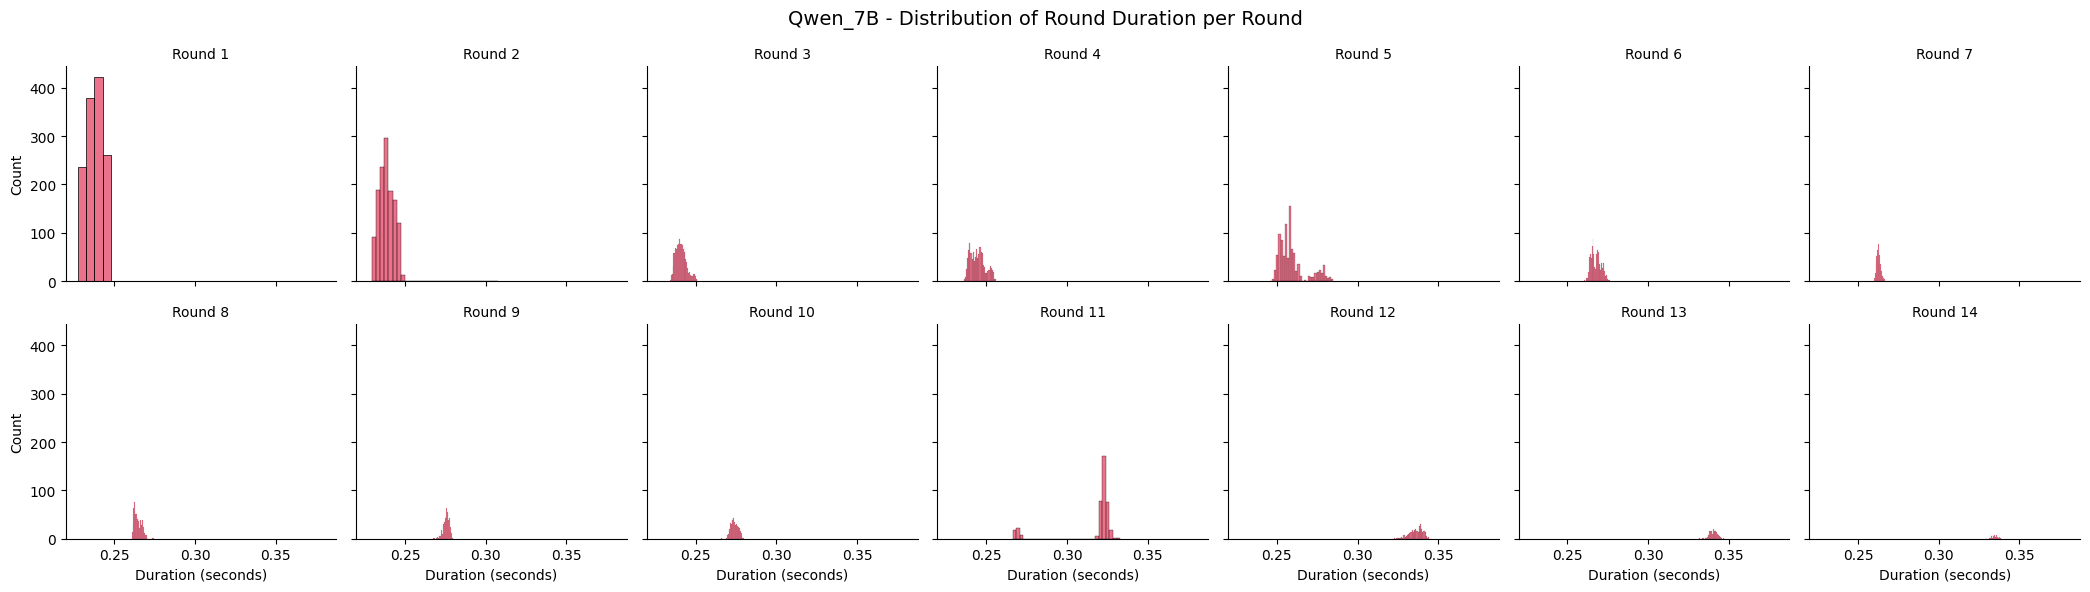

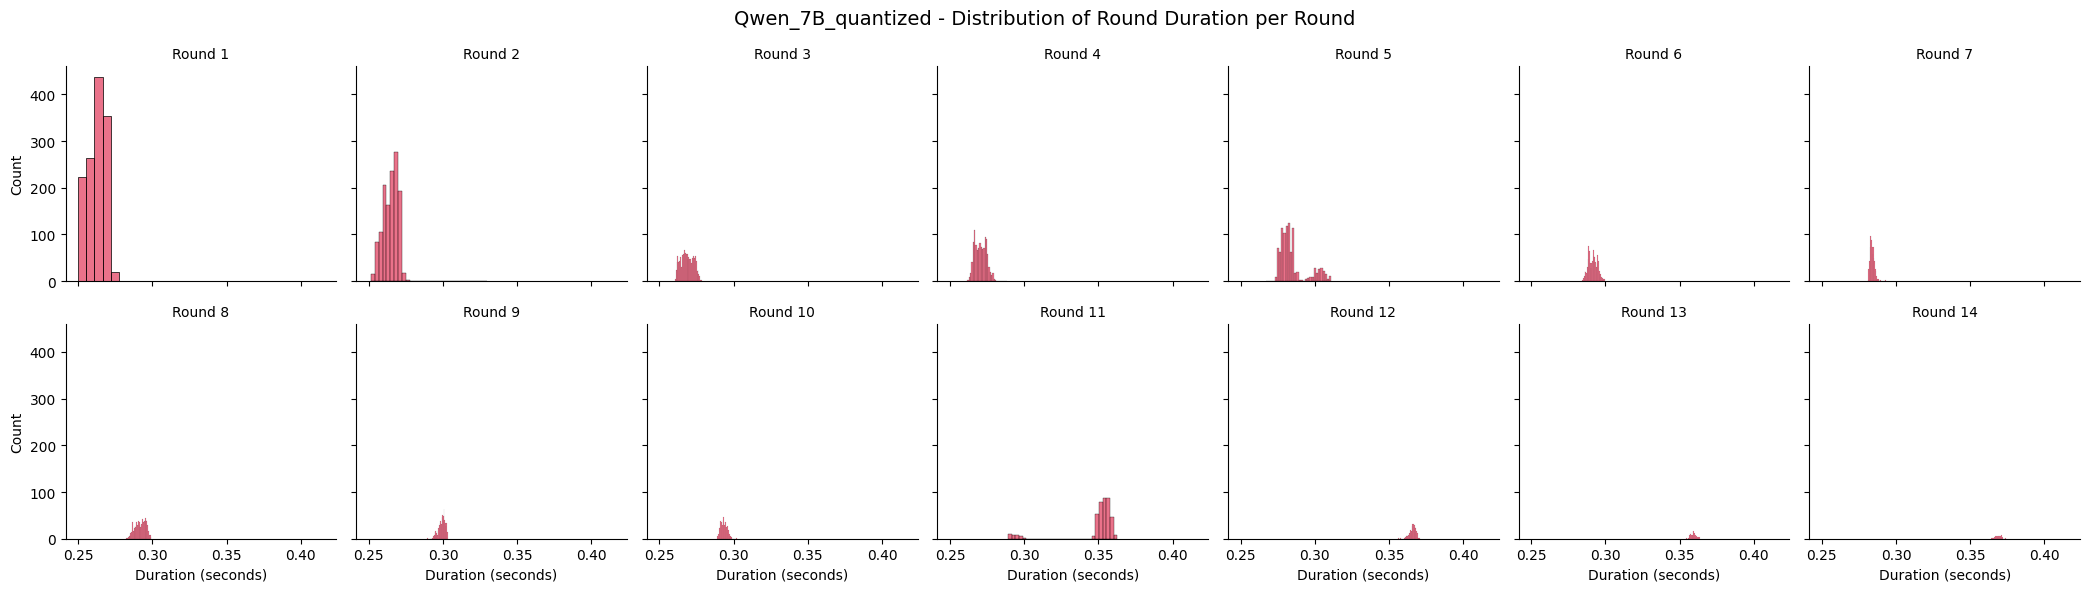

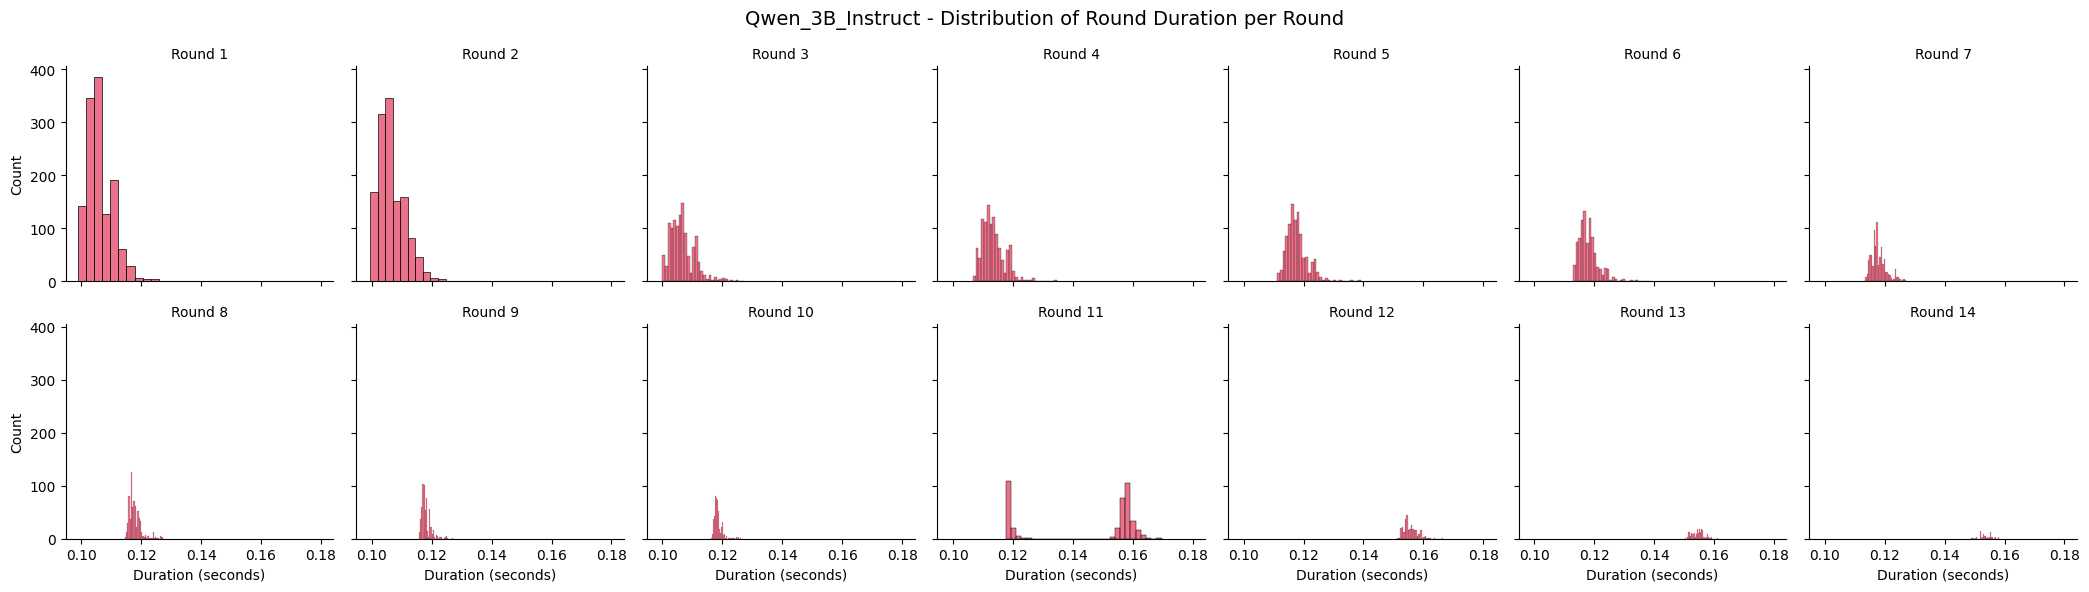

In [4]:
bimodal_models = [
    "Qwen_3B", "Qwen_3B_quantized", "Qwen_3B_Instruct_quantized", "Qwen_7B_Instruct_quantized",
    "Qwen_7B_Instruct", 
    "Qwen_7B", "Qwen_7B_quantized", "Qwen_3B_Instruct"
]

for model_name in bimodal_models:
    plot_round_duration_per_round(choices_df, games_df, model_name)

**Observations**: We notice that the round time changes its main peak at round 11.

### 3. Success Rate

In [5]:
import pandas as pd
from IPython.display import display

success_summary = (
    games_df
    .groupby('model', as_index=False)['success']
    .mean()
    .rename(columns={'success': 'success_rate'})
    .sort_values('success_rate', ascending=False)
)

success_summary['success_rate'] = success_summary['success_rate'].map("{:.1%}".format)

print("Success rate by model:")
display(success_summary)

Success rate by model:


,model,success_rate
1,Gemma_2B_Instruct,42.9%
10,Qwen_7B_Instruct_quantized,38.8%
6,Qwen_3B_Instruct_quantized,38.0%
2,Qwen_0.5B,37.8%
5,Qwen_3B_Instruct,37.7%
0,Gemma_2B,36.6%
9,Qwen_7B_Instruct,36.5%
11,Qwen_7B_quantized,36.2%
8,Qwen_7B,35.5%
4,Qwen_3B,34.2%


### 4. Comparing with human analysis

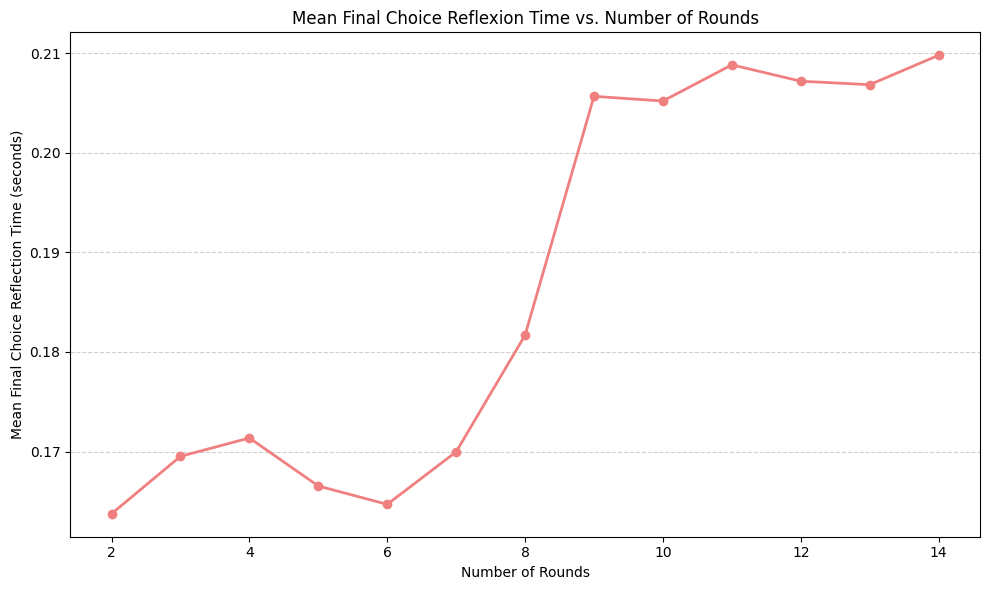

In [6]:
from utils.analysis_utils import *

games_df = add_final_round_time(games_df, choices_df)
plot_final_reflection_vs_num_rounds(games_df)

**Observations**: We note that the final reflection time increases with the number of rounds. Human data, on the contrary, showed the opposite trend.

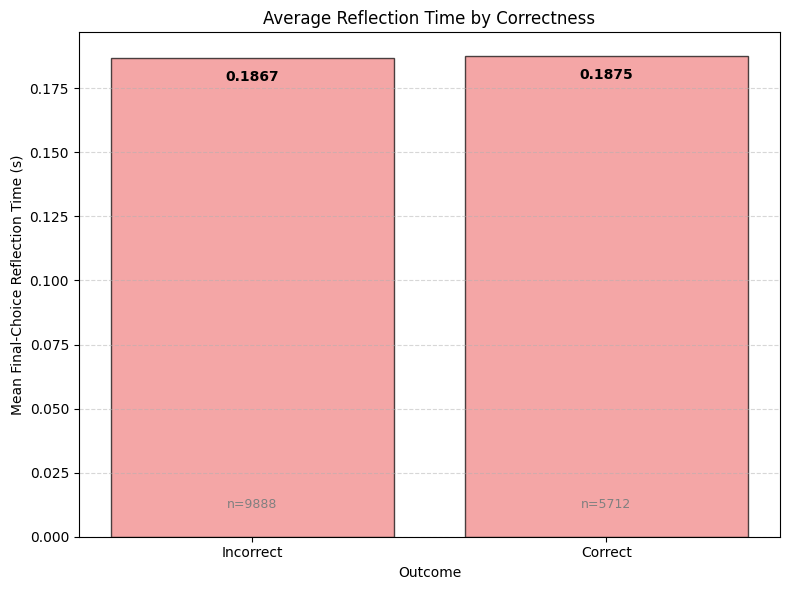

In [7]:
plot_mean_reflection_by_correctness(games_df)

**Observations**: We note that, similar to the human data, there is no significant difference in final reflection time between correct and incorrect answers.

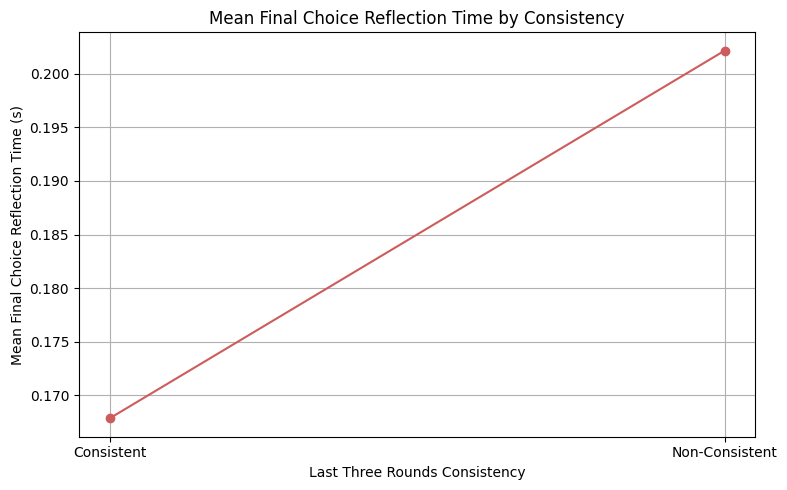

In [8]:
games_df = compute_last3_consistency(games_df, choices_df)
plot_reflexion_vs_consistency(games_df)

**Observations**: We note that, similar to the human data, the final decision round time is longer when the last 3 rounds were not consistent.

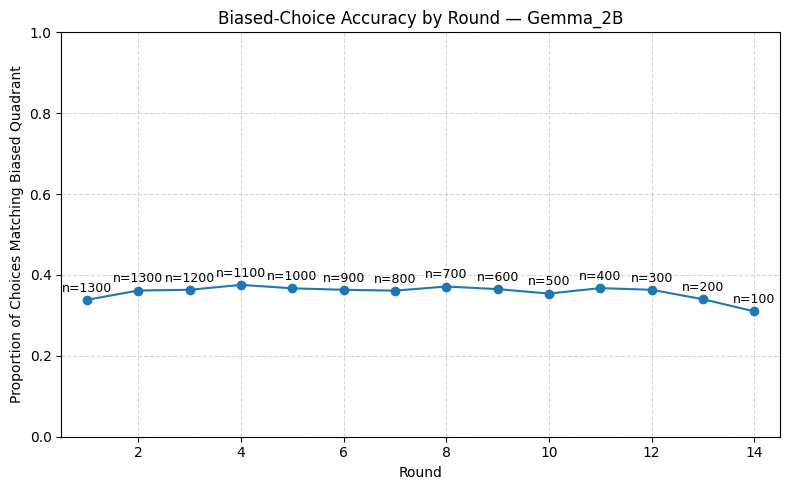

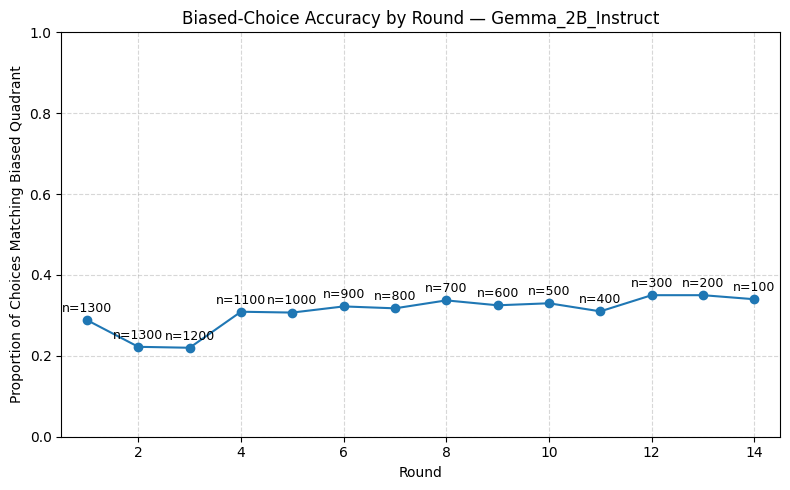

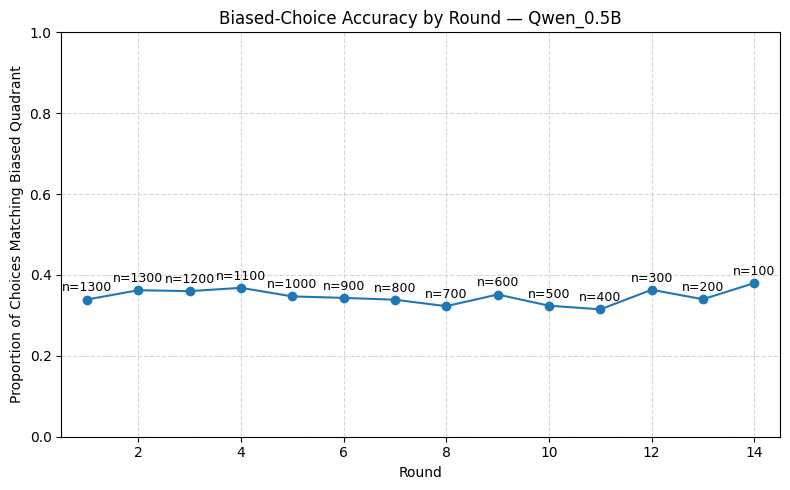

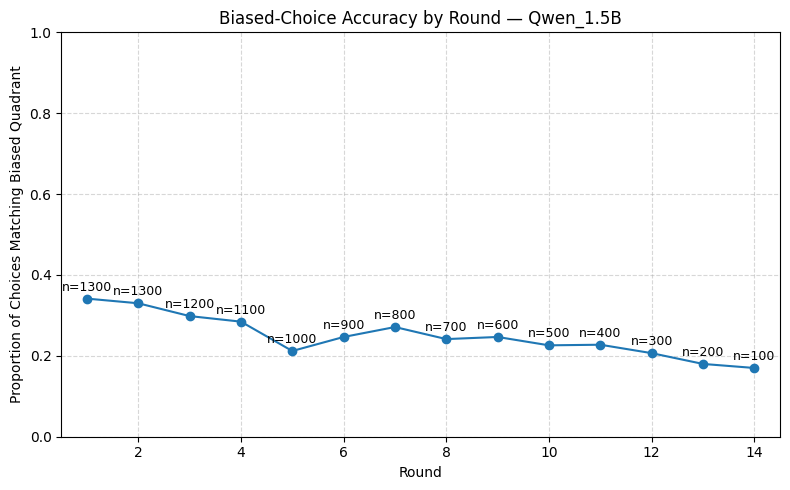

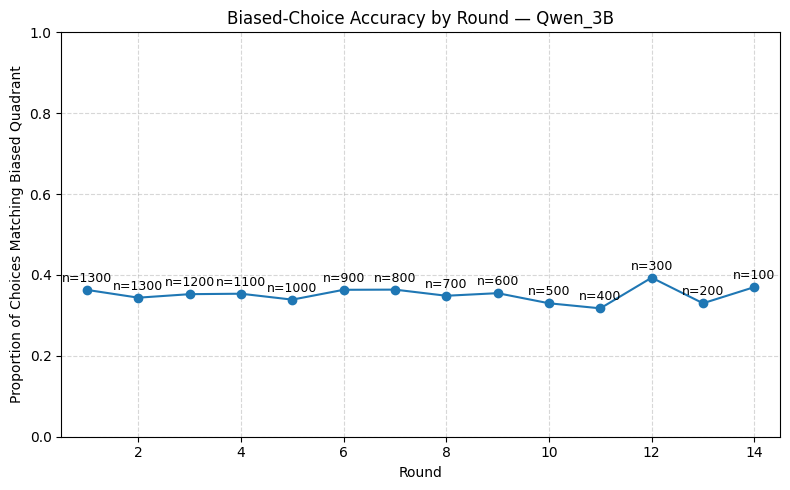

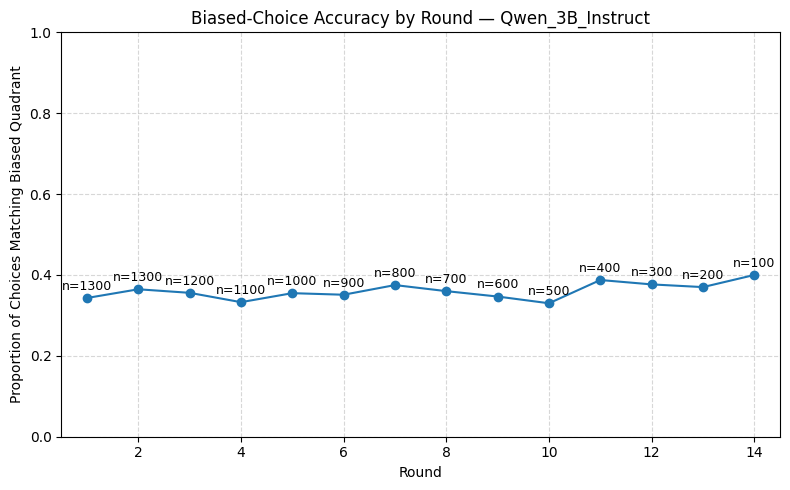

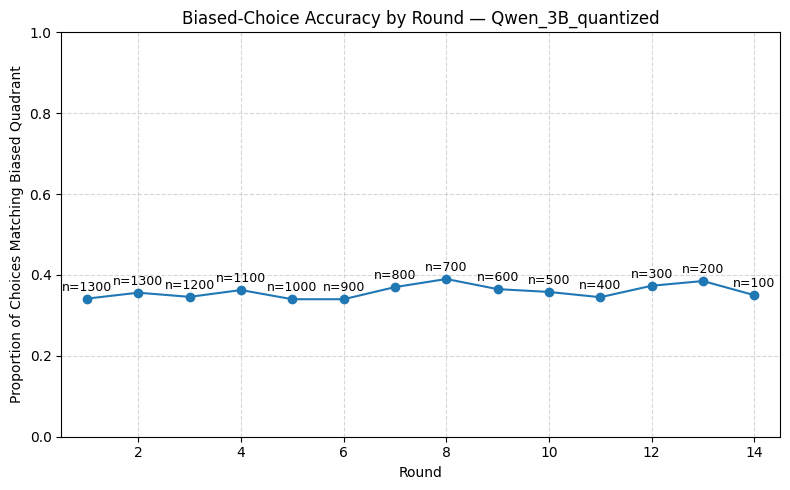

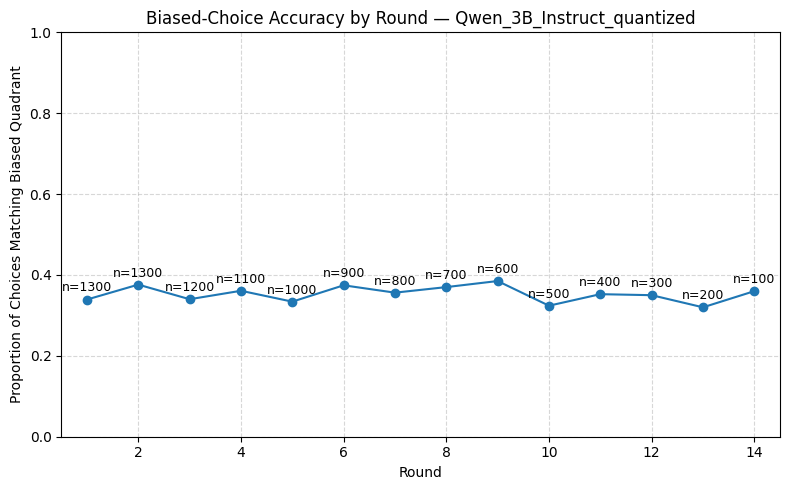

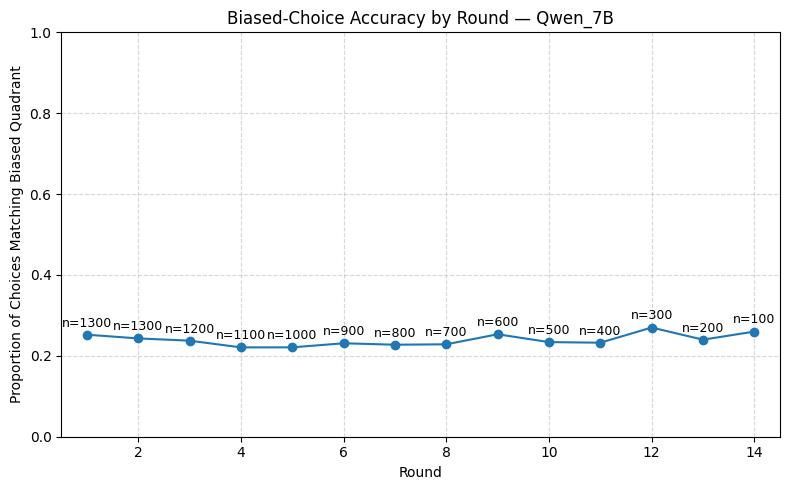

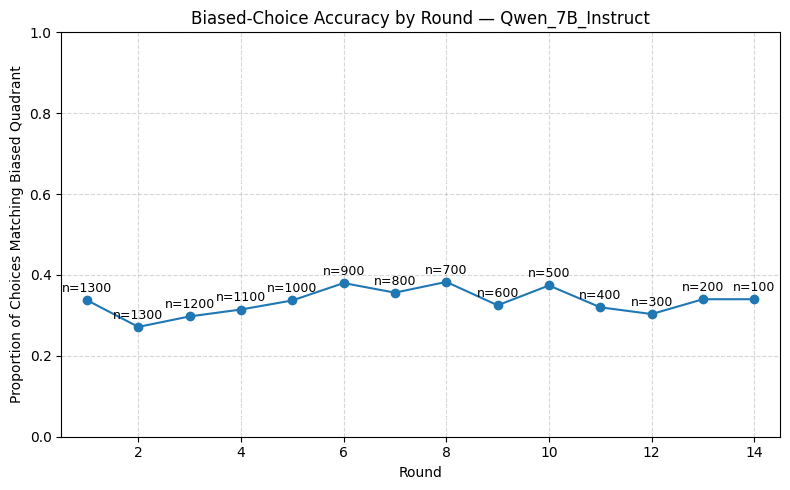

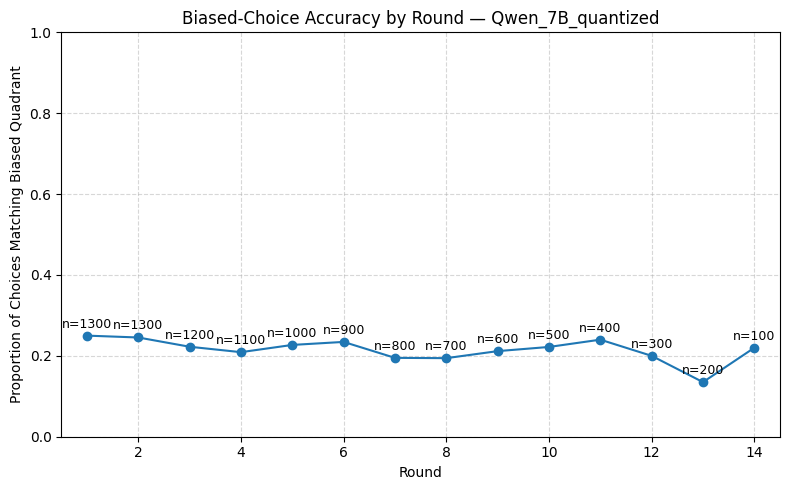

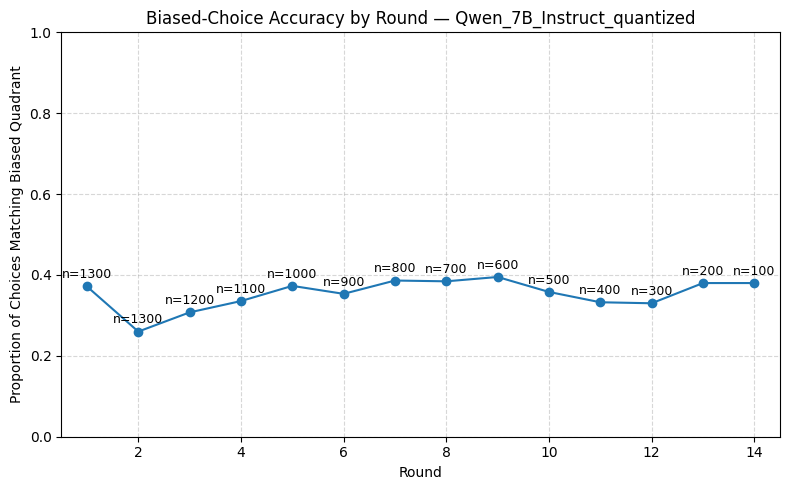

In [9]:
models = [
    'Gemma_2B',
    'Gemma_2B_Instruct',
    'Qwen_0.5B',
    'Qwen_1.5B',
    'Qwen_3B',
    'Qwen_3B_Instruct',
    'Qwen_3B_quantized',
    'Qwen_3B_Instruct_quantized',
    'Qwen_7B',
    'Qwen_7B_Instruct',
    'Qwen_7B_quantized',
    'Qwen_7B_Instruct_quantized'
]

plot_accuracy_by_round_per_model(choices_df, games_df, models)

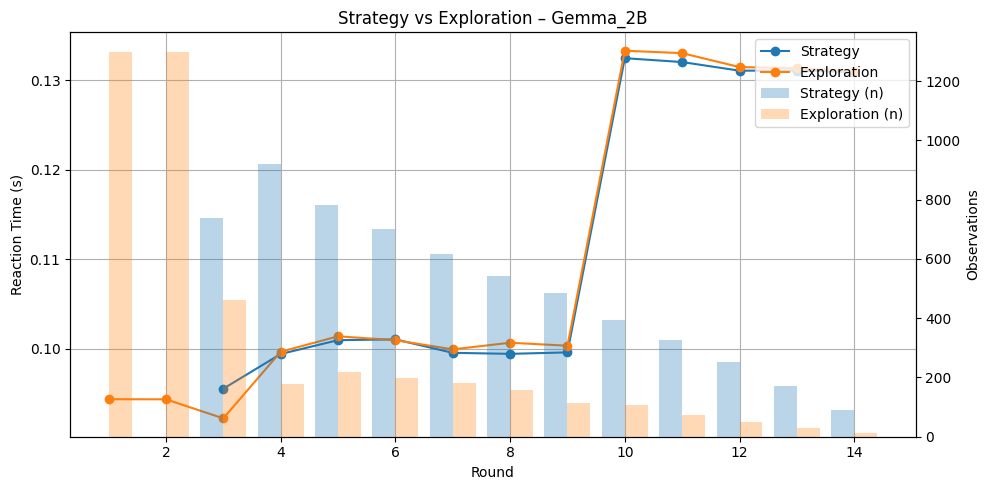

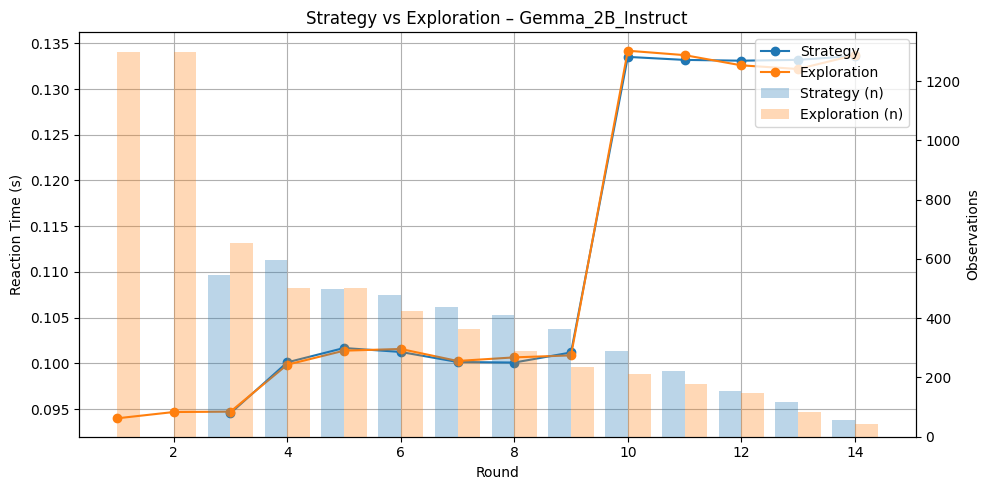

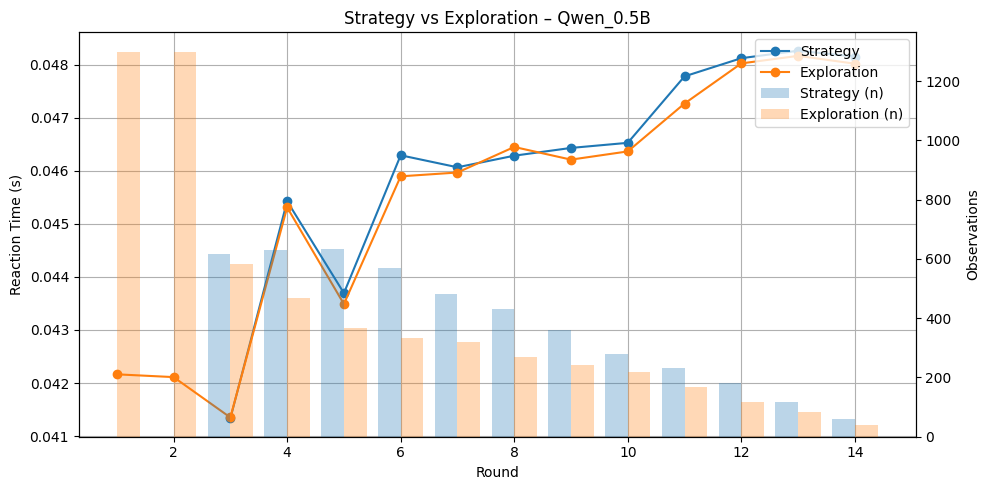

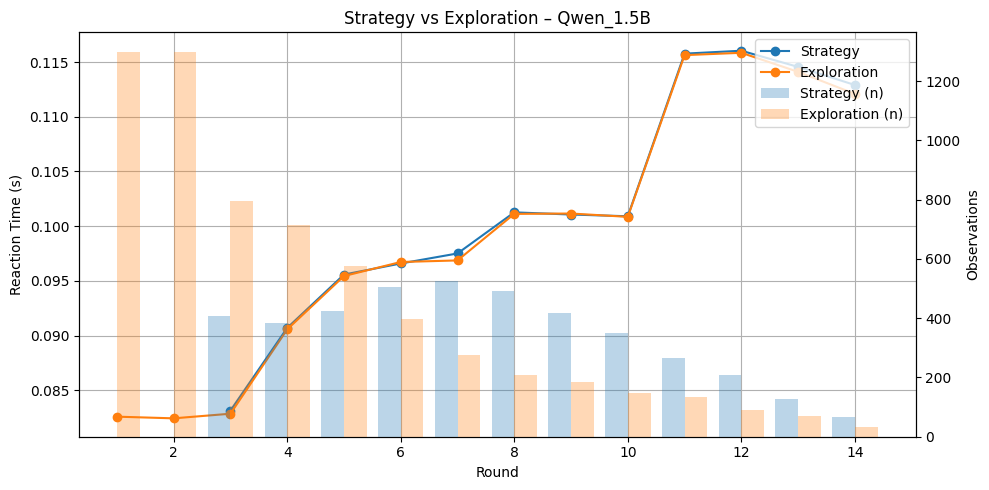

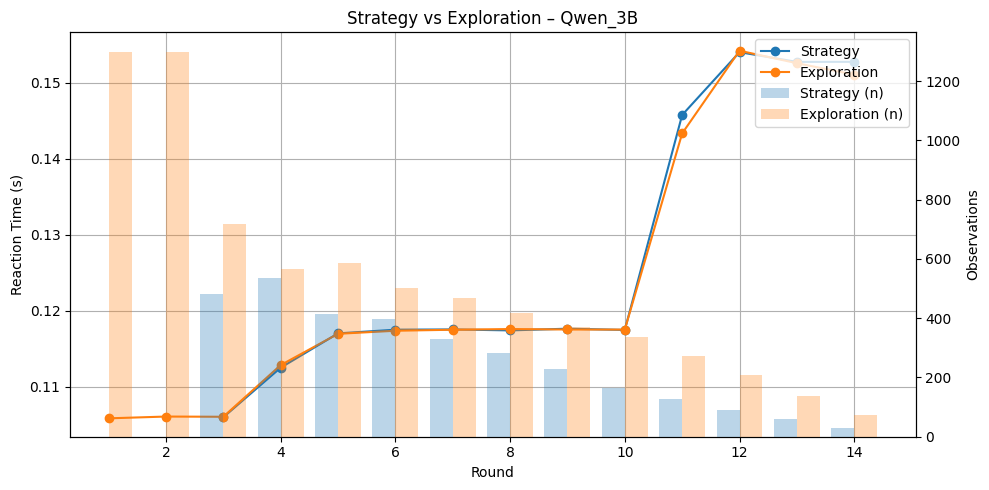

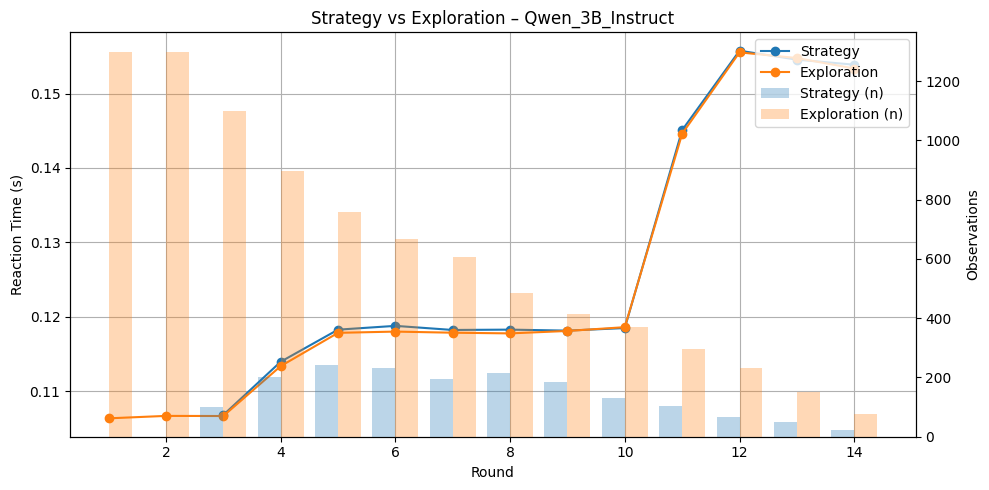

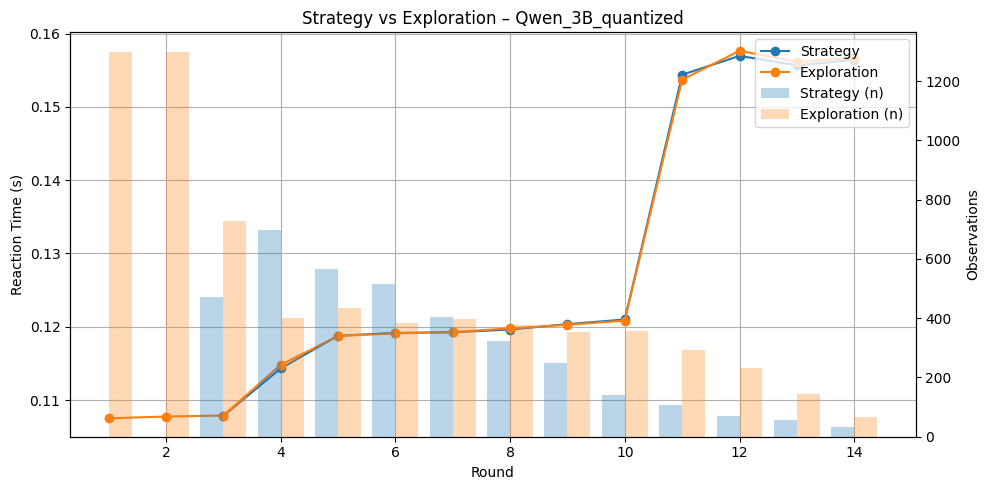

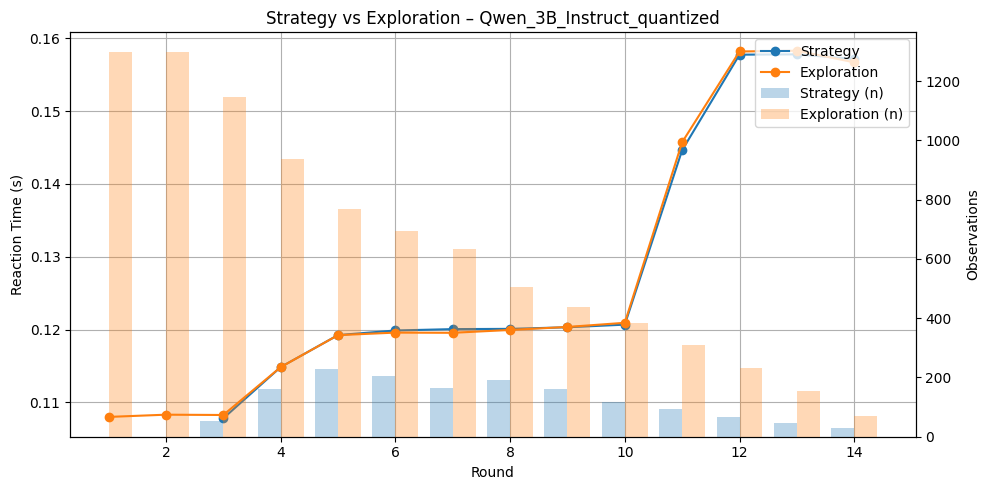

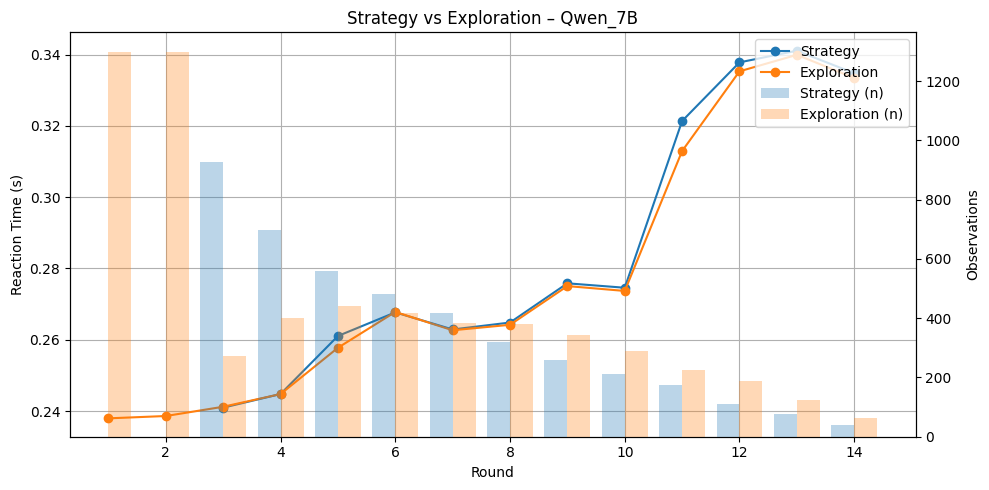

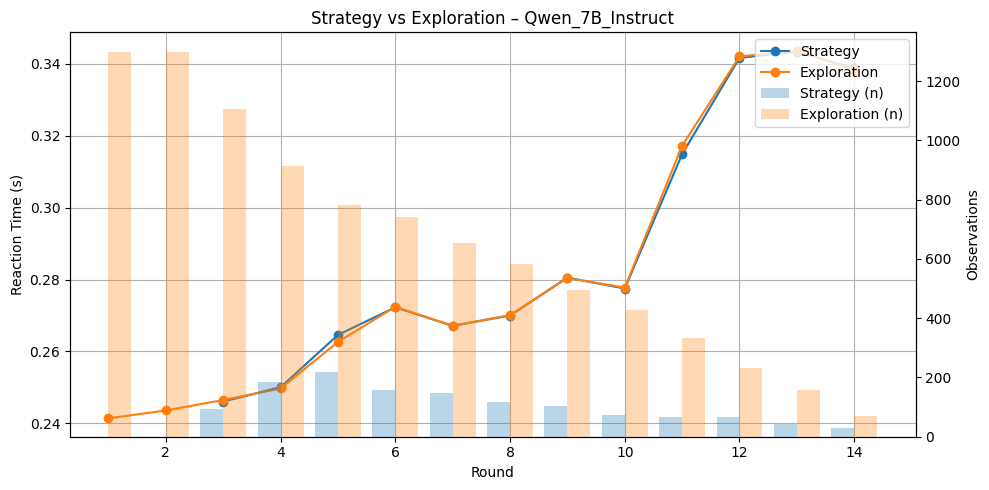

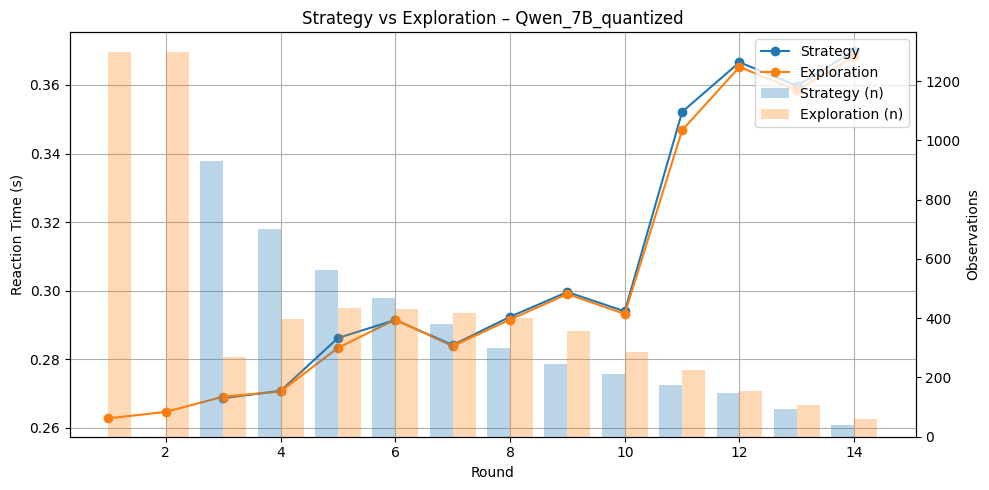

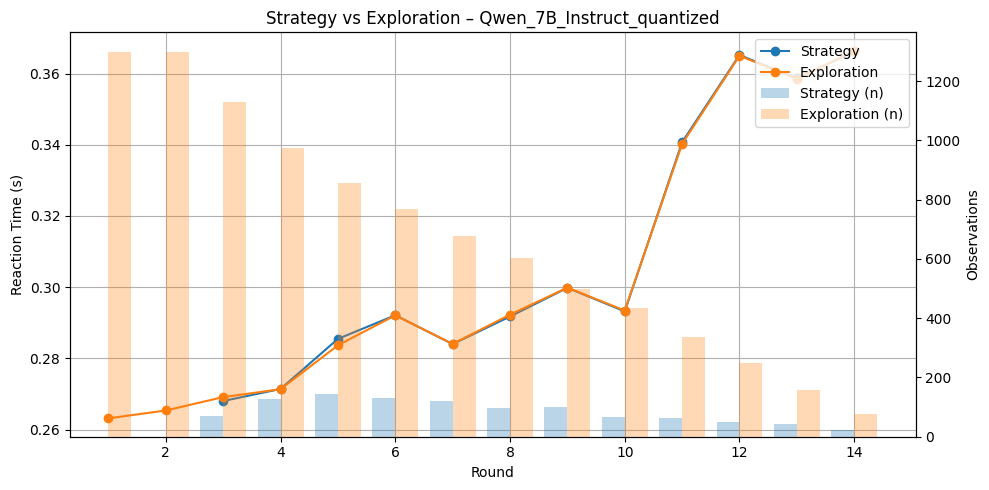

In [10]:
for m in models:
    plot_strategy_vs_exploration_llm(choices_df, games_df, m)

**Observations**: Behavior over time:

Gemma_2B : Strategic

Gemma_2B_Instruct: Balanced

Qwen_O.5B: Slightly strategic

Qwen_1.5B: Explorative then strategic

Qwen_3B: Slightly explorative

Qwen_3B_Instruct: Explorative

Qwen_3B_quantized: Strategic then explorative

Qwen_3B_Instruct_quantized: Explorative

Qwen_7B: Strategic then balanced/slightly explorative

Qwen_7B_Instruct: Explorative

Qwen_7B_quantized: Strategic then balanced/slightly explorative

Qwen_7B_Instruct_quantized: Explorative

### 5. Invalid choice analysis


Invalid (None) choices by model:
                            none_count  total_rounds  none_prop
model                                                          
Qwen_7B_quantized                 3681         10400   0.353942
Qwen_7B                           3417         10400   0.328558
Gemma_2B                          3295         10400   0.316827
Qwen_1.5B                         3173         10400   0.305096
Gemma_2B_Instruct                 3099         10400   0.297981
Qwen_0.5B                         2116         10400   0.203462
Qwen_3B_quantized                 1454         10400   0.139808
Qwen_7B_Instruct                  1431         10400   0.137596
Qwen_7B_Instruct_quantized        1298         10400   0.124808
Qwen_3B                            989         10400   0.095096
Qwen_3B_Instruct                   569         10400   0.054712
Qwen_3B_Instruct_quantized         542         10400   0.052115


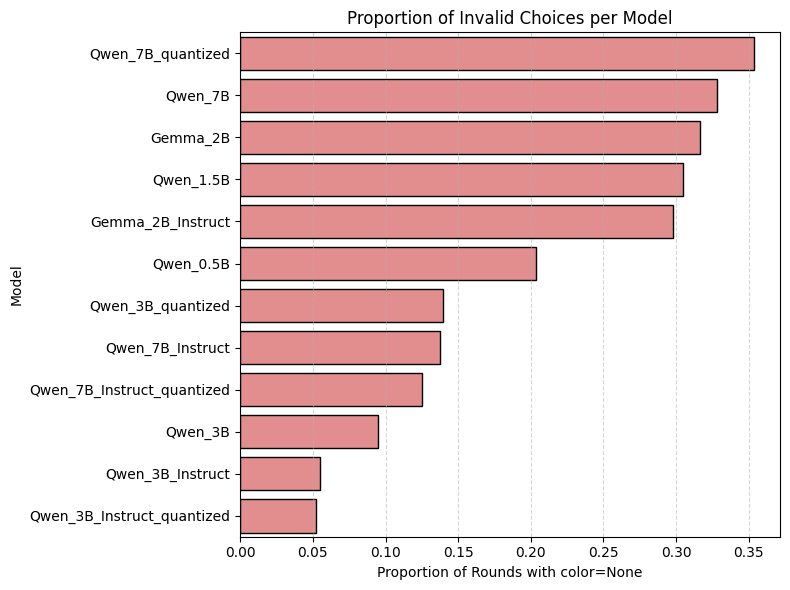

In [11]:
from utils.invalid_utils import *

summary_df = plot_invalid_choice_proportions(choices_df, games_df)

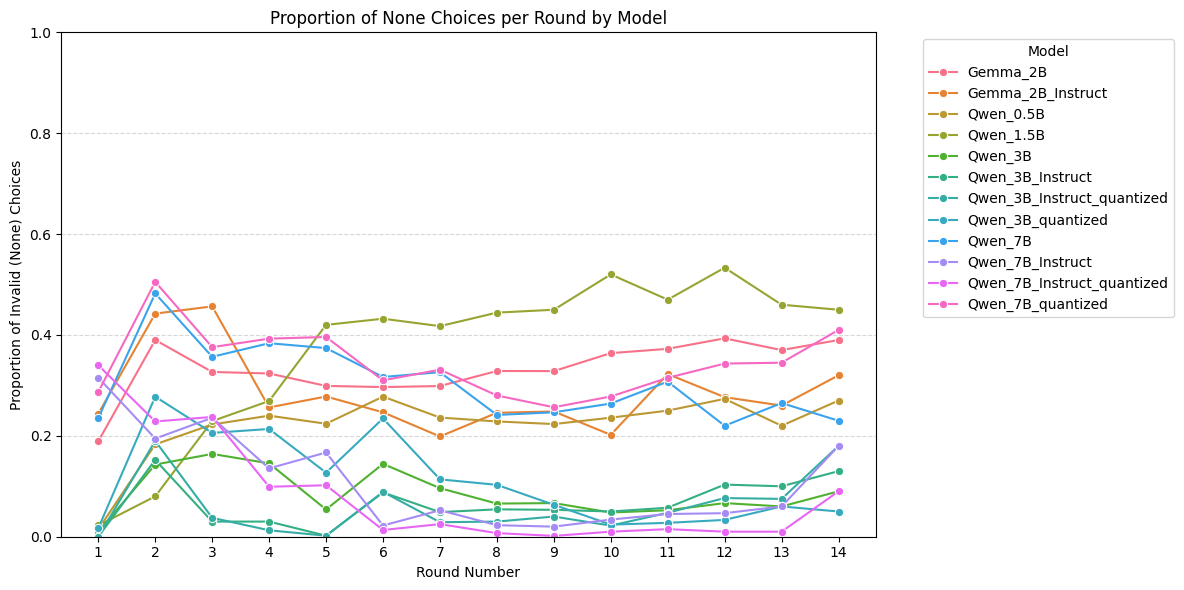

In [12]:
round_summary = plot_invalid_choice_proportions_by_round(choices_df, games_df)

**Observations**: If we compare these results with the behavioral patterns observed earlier, we note that strategic behaviors lead to a higher proportion of invalid choices. This is because the model tends to repeatedly select the same quadrant, which may not always be available at a given round. In contrast, for explorative behaviors, we observe fewer invalid choices. For example, Qwen_1.5B starts off explorative, resulting in few invalid choices, but later becomes strategic, leading to more invalid choices. Similarly, Qwen_7B is initially strategic and then becomes more balanced or slightly explorative, which explains the decreasing proportion of invalid choices over time.


Invalid (None) choices by number of quadrants:
   nb_quadrants  none_count  total_count  none_prop
0             2       14273        62400   0.228734
1             4       10791        62400   0.172933


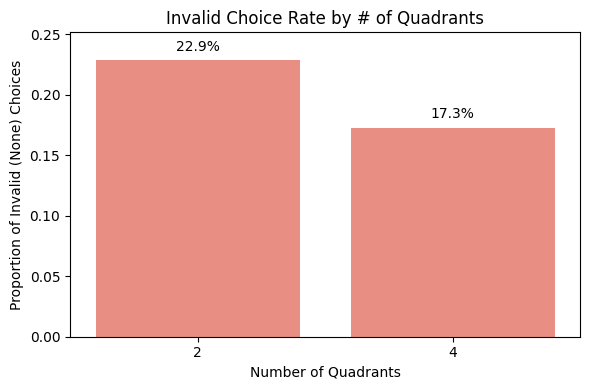

In [13]:
plot_invalid_choices_by_quadrants(choices_df, games_df)

### 6. Influence of Available cues

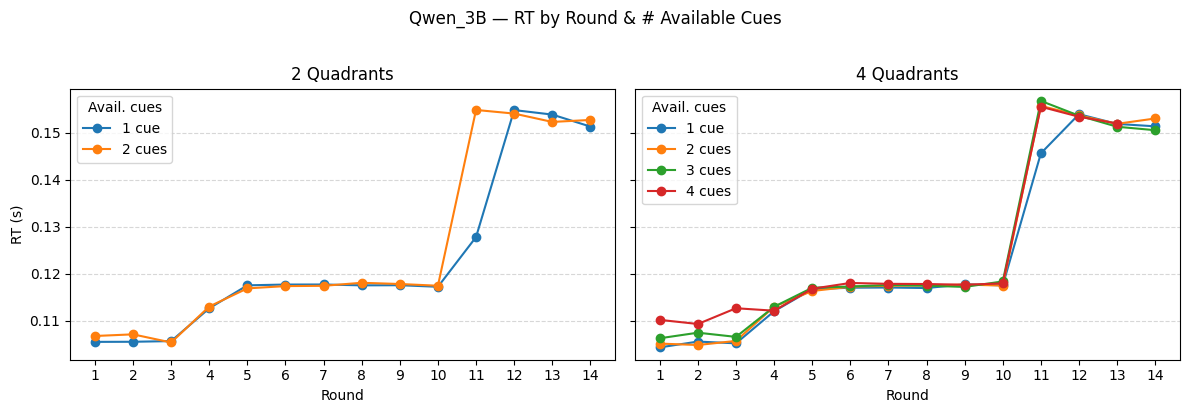

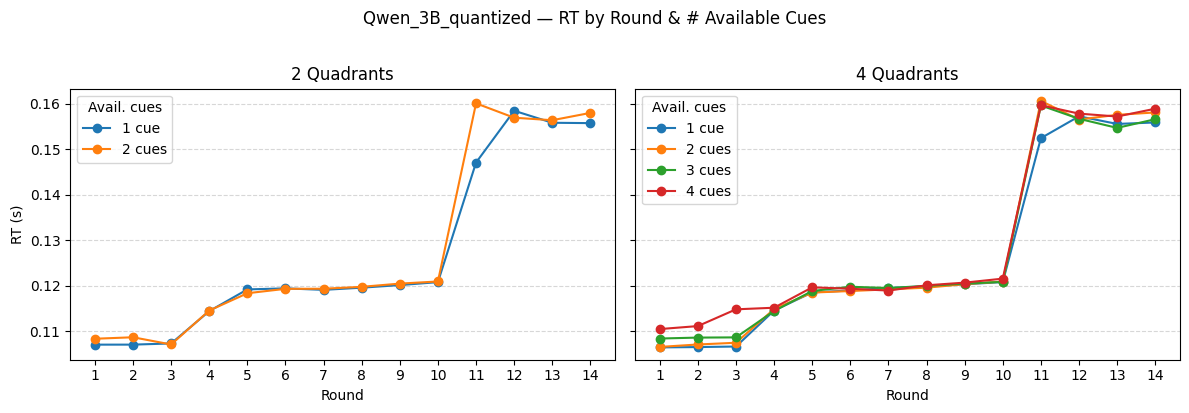

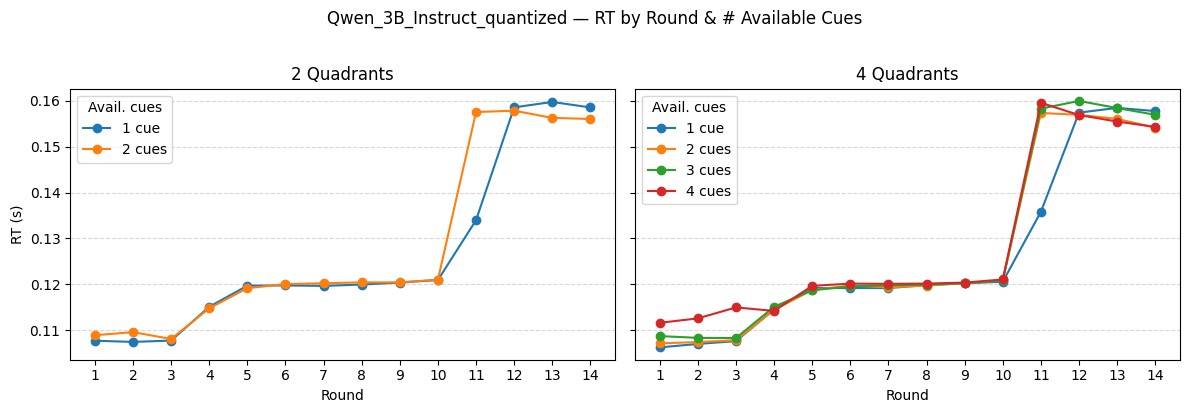

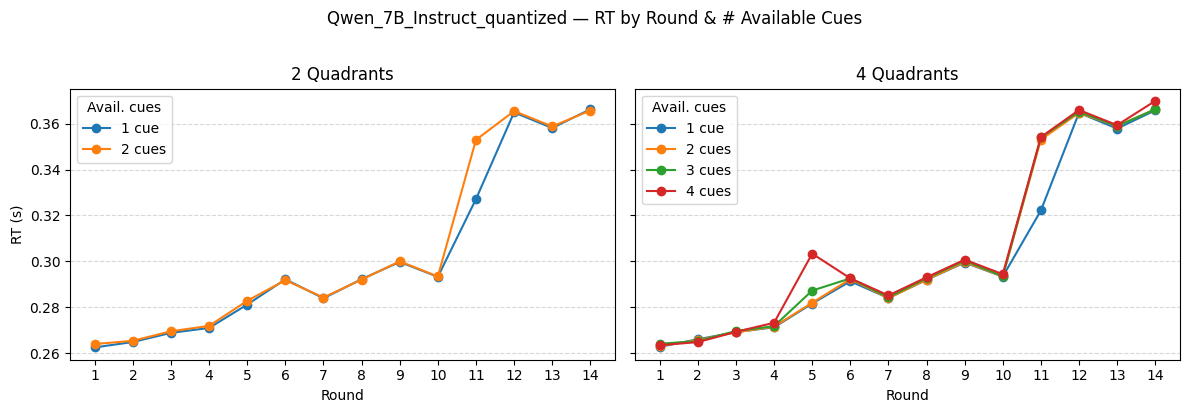

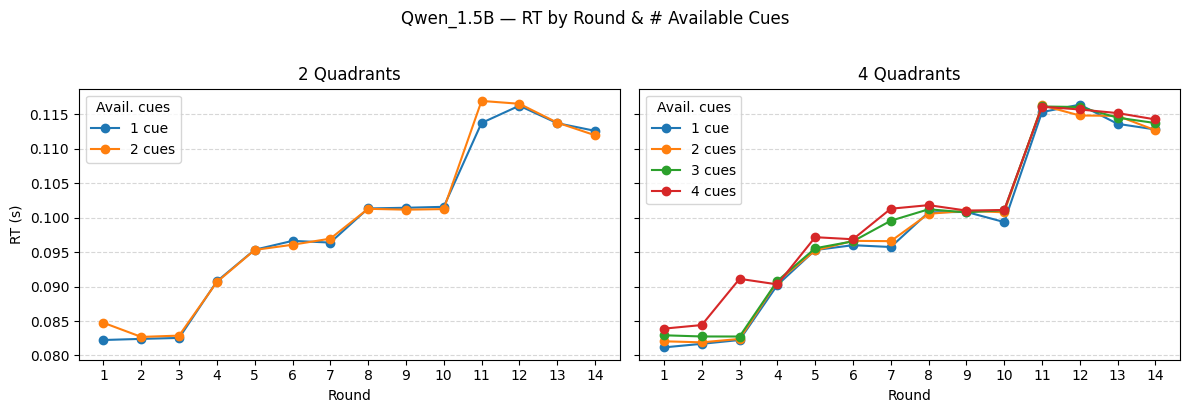

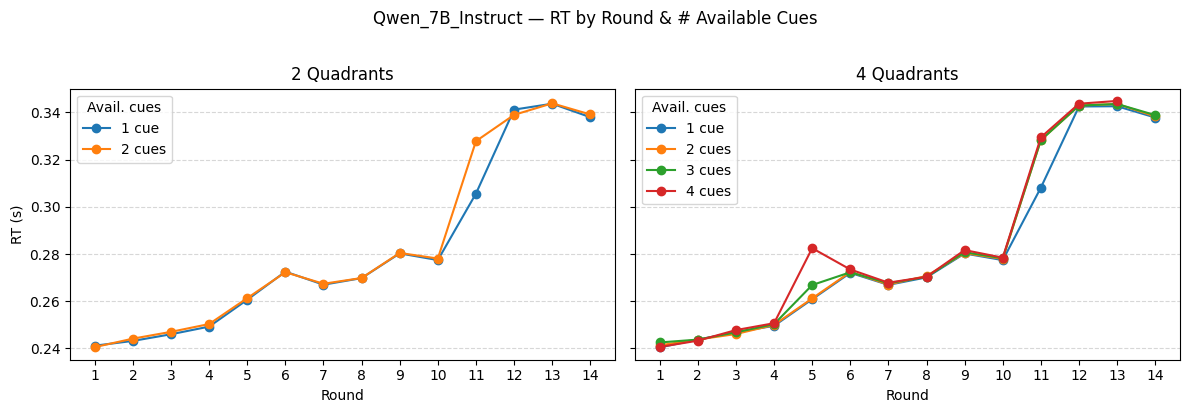

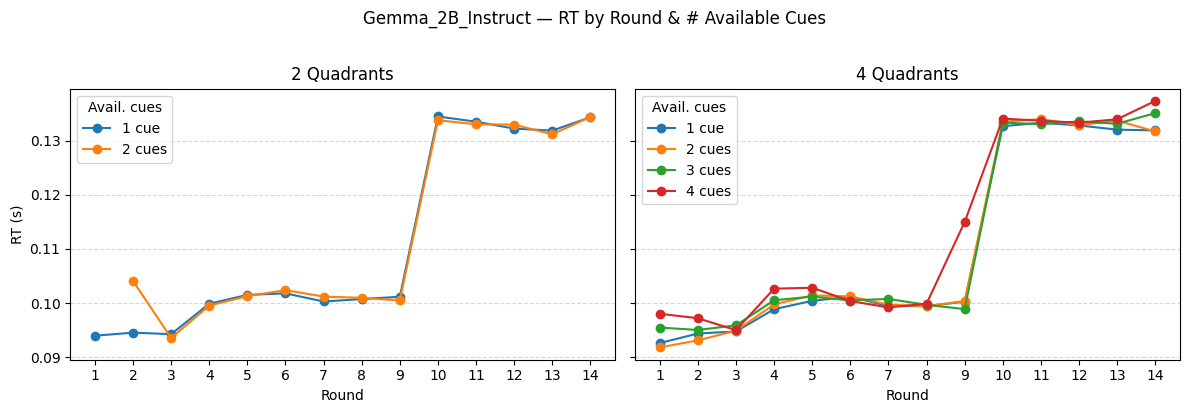

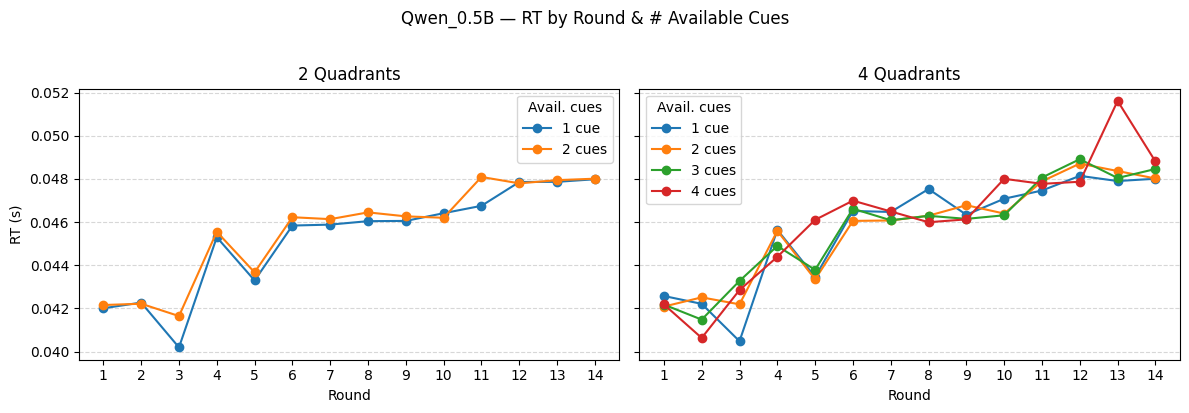

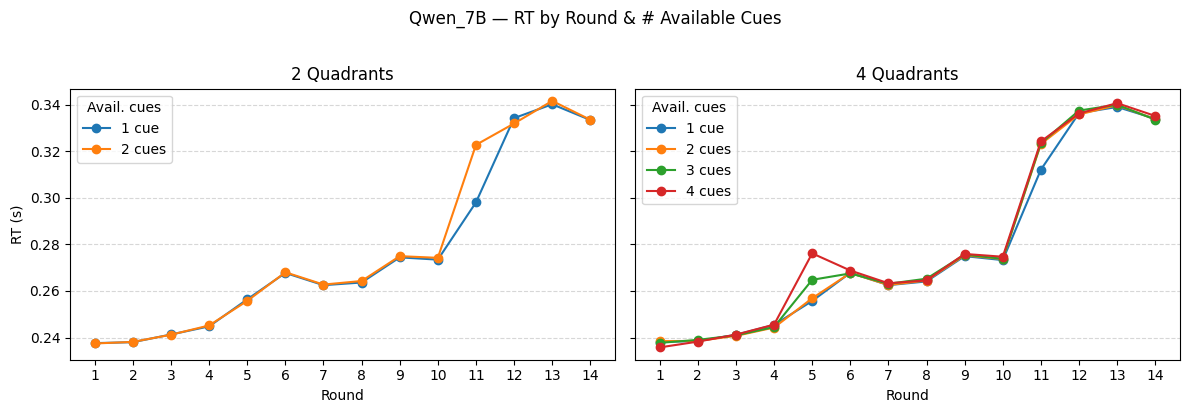

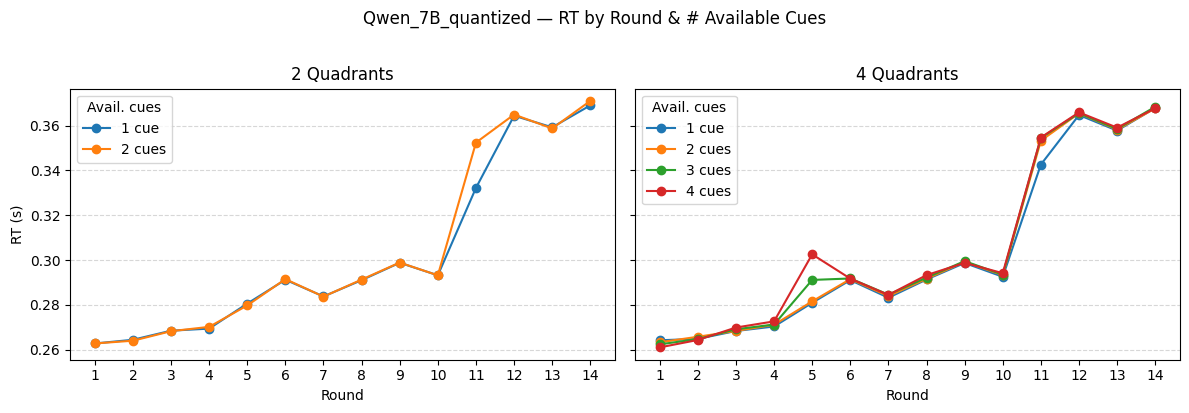

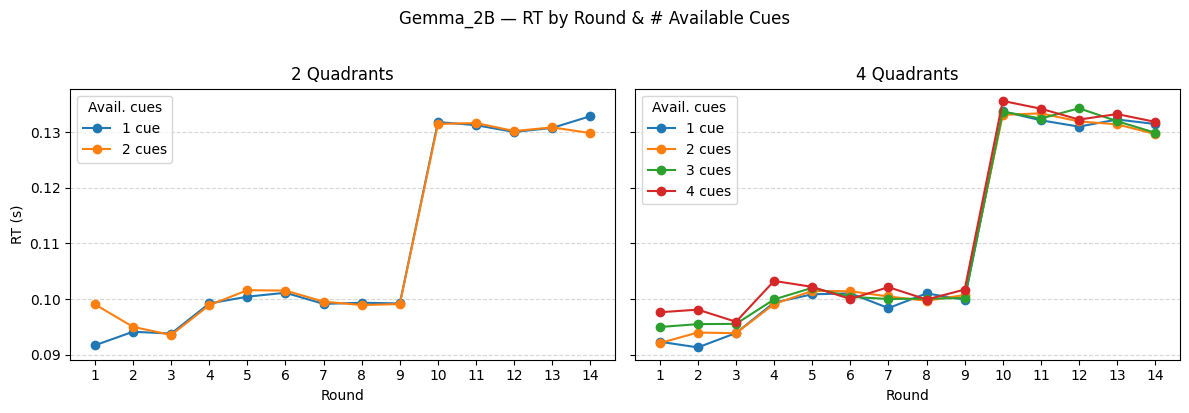

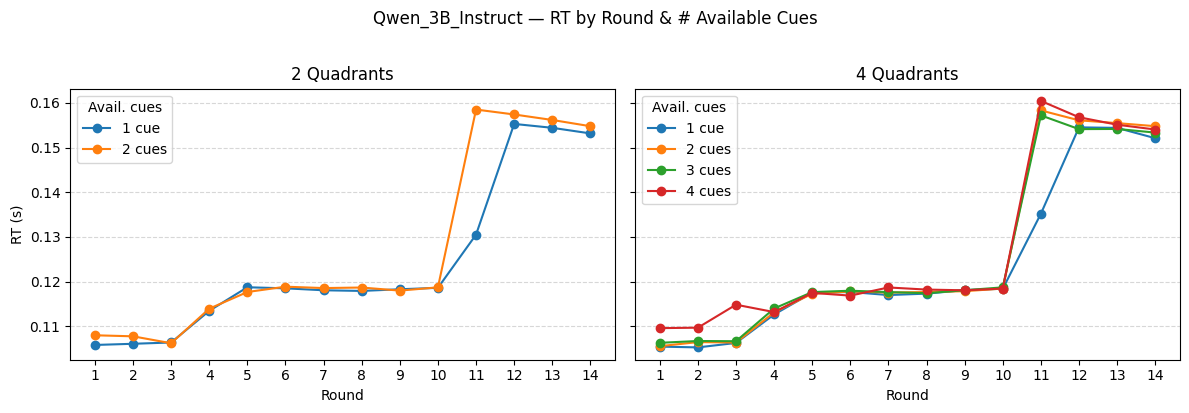

In [14]:
from utils.available_cues_utils import plot_rt_by_cues_round_per_model

plot_rt_by_cues_round_per_model(choices_df, games_df)